**INTRODUCTION TO STATISTICS IN PYTHON**

- Statistics: The practice and study of collecting and analyzing data
- Summary Statistic: Fact or summary of some data

1) Descriptive Statistics: 
- Describe and summarize data

2) Inferential Statistics:
- Uses sample data to make inferences about larger population

- Numeric Data - Continuous or Discrete
- Categorical Data - Nominal or Ordinal


## Measures of Center ##

- Mean is much more sensitive to extreme values than Median
- Thus it makes sense to use mean in the case of symmetric data
- Median is better used for asymmetric data as mean gets deviated in the direction of the skew for asymmetrical data


In [ ]:
import numpy as np
# Mean - Higher
np.mean(DataFrame['Column'])

# Median - 50% of data is lower than median and 50% is higher
np.median(DataFrame['Column'])

# Mode - Most Frequesnt Value
DataFrame['Column'].value_counts()
# OR
import statistics
statistics.mode(DataFrame['Column'])


## Measures of Spread ##

1) Variance:
- Average Distance of each data point from the datas mean
- Higher the variance, the more spread out the data is
- unit of variance is square of the unit of the data

2) Standard Deviation:
- Unit of Standard Deviation is the same as the unit of the data

3) Mean Absolute Deviation
- Mean of the absolute values of the distances from mean
- Standard Deviation squares distances so longer distances are penalized more than the shorter ones. Mean Absolute Distance penalizes each distance equally

4) Quantiles (Percentiles)
- np.quantile(DataFrame['column'], 0.5) means 50% of the data is above the answer value and 50% of the data is below the answer value
- Quartile: np.quantile(DataFrame['column'], [0, 0.25, 0.5, 0.75, 1])

5) Interquartile Range(IQR):
- Distance between the 25th and 75th percentile
- Height of the box in a box plot
- np.quantile(DataFrame['column'], 0.75) - np.quantile(DataFrame['column'], 0.25)

In [ ]:
# VARIANCE

dists = DataFrame['column'] - np.mean(DataFrame['column']) # Calculate the distance of each data point from the mean of the data
sq_dists = dists ** 2 # Square the distances
sum_sq_dists = np.sum(sq_dists) # Add the squared distances
variance = sum_sq_dists / (numofdatapoints - 1) 
# OR
np.var(DataFrame['column'], ddof = 1) # ddof = Delta Degrees of Freedom.The N-ddof divisor is used in calculations, where N is the number of elements. By default, the value of this parameter is set to 0.

# STANDARD DEVIATION
np.std(DataFrame['column'], ddof = 1)

# MEAN ABSOLUTE DEVIATION
dists = DataFrame['column'] - mean(DataFrame$Column)
# OR
np.mean(np.abs(dists))

# QUANTILE
np.quantile(DataFrame['column'], 0.5) # 0.5 Quantile means Median
# Quartile:
np.quantile(DataFrame['column'], [0, 0.25, 0.5, 0.75, 1])

# INTERQUARTILE RANGE (IQR)
np.quantile(DataFrame['column'], 0.75) - np.quantile(DataFrame['column'], 0.25)
# OR
from scipy.stats import iqr
iqr(DataFrame['column'])

## Outliers ##

- Datapoint that is substantially different from the others
- A data point is an outlier if:
data < Q1 - (1.5*IQR) OR data > Q3 + (1.5*IQR)


- All these summary statistics can be calculated in one go using the .describe method

In [ ]:
# FINDING OUTLIERS

from scipy.stats import iqr
iqr = iqr(DataFrame['column'])
lower_threshold = np.quantile(DataFrame['column'], 0.25) - 1.5*iqr
upper_threshold = np.quantile(DataFrame['column'], 0.75) + 1.5*iqr

DataFrame[(DataFrame['Column'] < lower_threshold) | (DataFrame['Column'] > upper_threshold)]

# All in one go
DataFrame['Column'].describe()

## Measuring Chance ##

- Determining the probability of an event hapenning
- A random row can be selected from a dataset using the sample method
- Two events are independent if the probability of the second event is not affected by the first one. When sampling with replacement, each pick is independent.
- Two events are dependent if the probability of the second event affected by the first one. When sampling without replacement, each pick is dependent.

In [ ]:
# Selecting any one row (Sampling)

np.random.seed(10) # Sets a seed so that we can repeat the test to get the same results
Dataframe.sample()

# Sampling twice in Python without replacement
DataFrame.sample(2)

# Sampling twice in Python with replacement
DataFrame.sample(2, replace = True)

## Discrete Distributions ##

- Discrete Probability distributions represent situations with discrete outcomes
- A probability distribution described the probability of each distribution in a scenario
- Expected Value (Expectation): It is the mean of the probability distribution
- Law of Large Numbers: As the size of the sample increases, the sample mean will reach closer to the expected mean


## Continuous Distribution ##

1) Uniform Distribution:

- To generate random numbers according to the uniform distribution, use uniform.rvs()

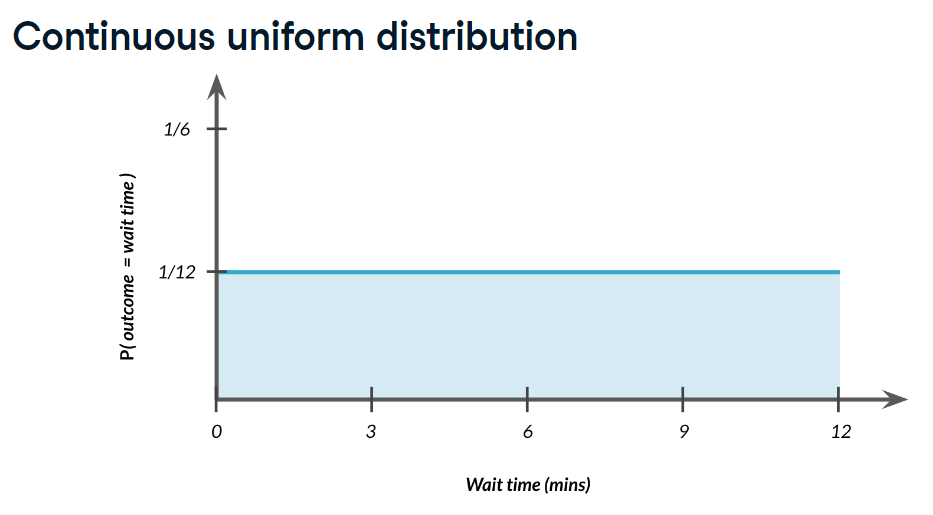

In [ ]:
# UNIFROM DISTRIBUTION

from scipy.stats import uniform
# Syntax : uniform.cdf(selected_data, lower_limit, upper_limit)
# cdf - Cumulative distribution function
uniform.cdf(7, 0, 12)  #returns the probability of the wait time being less than 7mins for a dataset between 0 and 12 mins
# Generating random numbers following the uniform distribution
uniform.rvs(0, 5, size = 10) # Generates 10 random numbers between 0 and 5 following the uniform distribution


## Binomial Distribution ##

- Flipping a coin has a binary outcome i.e. heads or tails
- Binomial Distribution describes the number of successes in a sequence of independent trials
- n: total no of trials being performed
  p: Probability of success
- Expected value = n * p
- Each trial must be independent

In [ ]:
# BINOMIAL DISTRIBUTION

from scipy.stats import binom
# Syntax for a single flip:
# binom.rvs(num_of_coins, prob_of_event, size = num_trials)
binom.rvs(1, 0.5, size = 1)
# One flip 8 times
binom.rvs(1, 0.5, size = 8)
# 8 coins fliped once at the same time
binom.rvs(8, 0.5, size = 1)

# Probability of getting 7 heads
# pmf - Probability Mass Function
# Syntax: binom.pmf(num_heads, num_trials, prob_of_heads)
binom.pmf(7, 10, 0.5)

# Probability of getting 7 heads or fewer heads
# Syntax: binom.cdf(num_heads, num_trials, prob_of_heads)
binom.cdf(7, 10, 0.5)

## Normal Distribution ##
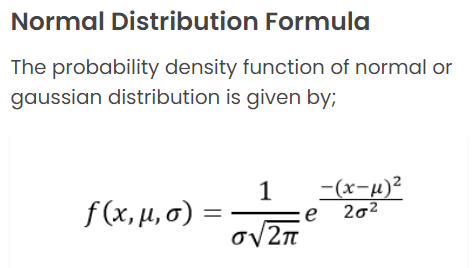
- Symmetrical 
- Area beneath curve = 1
- Prob is never 0
- Described by mean and Standard Deviation
68 95 99.7 Rule:
- 68% Area falls within 1 standard deviation
- 95% Area falls within 2 standard deviation
- 99.7% Area falls within 3 standard deviation

In [ ]:
# NORMAL DISTRIBUTION

from scipy.stars import norm
# Syntax: norm.cdf(num_of_interest, Mean, Std)
# What percent of women are shorter than 154cm?
norm.cdf(154, 161, 7)
# What percent of women are taller than 154cm?
1 - norm.cdf(154, 161, 7)
# What percent of women are between 154cm and 157cm?
norm.cdf(157, 161, 7) - norm.cdf(154, 161, 7)

# What height are 90% of women shorter than?
# ppf : Normal Distribution Percent Point Function
# Syntax: norm.ppf(percentage, Mean, Std)
norm.ppf(0.9, 161, 7)
# What height are 90% of women taller than?
norm.ppf((1 - 0.9), 161, 7)

# Generating Random Numbers
# Syntax: norm.rvs(Mean, Std, size = num_of_values)
norm.rvs(161, 7, size = 10)

## The Central Limit Theorum ##

- The sampling distribution of a statistic becomes closer to a normal distribution as the number of trials increases
- Samples should be random and independent
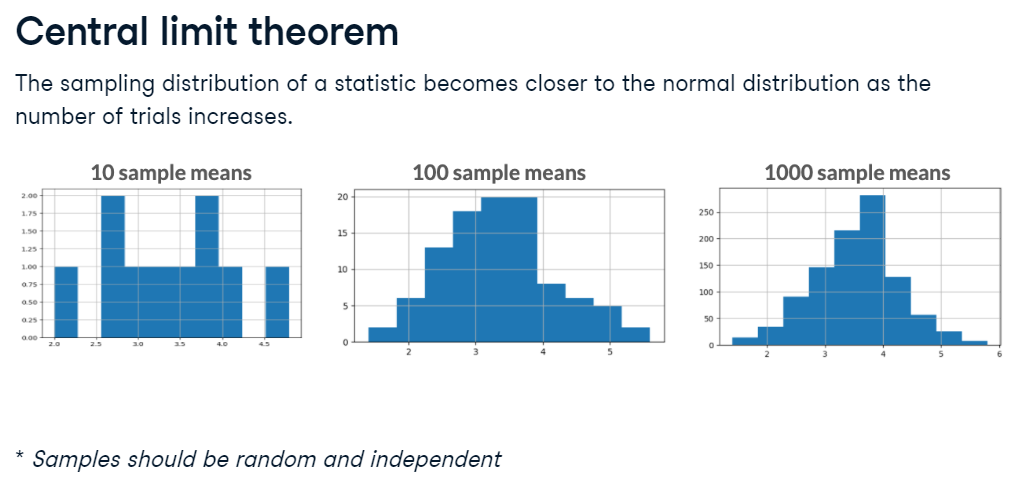

- CLT also applies to Standard Deviation and Proportions
- Used to estimate characteristics of an unknown distribution
- Used to more easily estimate the characteristics of large populations


## Poisson Distribution ##

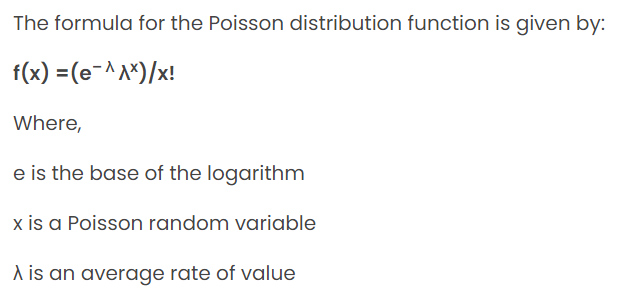

Poisson Process:
- It is a discrete distribution 
- Events appear to happen at a certain rate, but completly at random
eg: No. of animals adopted from an animal shelter per week
- The time unit i.e. hours, days, week, etc is irrelevant as long as it is consistent
- Poisson Distribution describes the probability of some number of events happening over a fixed period of time
- Poisson Distribution is descibed by Lambda, the average number of events happening in a time interval
- Central Limit Theorum still applies

In [ ]:
# POISSON DISTRIBUTION

from scipy.stats import poisson
# Syntax: poisson.pmf(num_of_interest, Lambda)
poisson.pmf(5, 8)

# Probability of less than or equal to
# Syntax: poisson.cdf(num_of_interest, Lambda)
poisson.cdf(5, 8)

# Probability of greater
1 - poisson.cdf(5, 8)

# Sampling from Poisson Distribution
# Syntax: poisson.rvs(lambda, size = size)
poisson.rvs(8, size = 10)



## Exponential Distribution ##

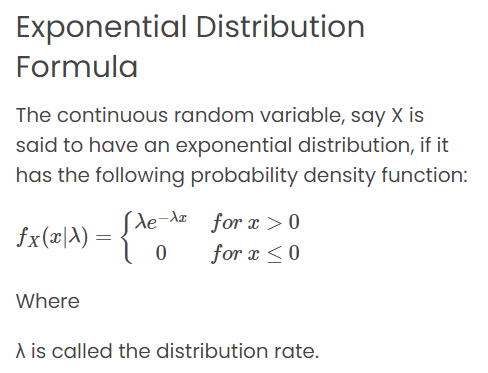

- represents the probability of time passing between Poisson Events
eg: Probability of More than 1 day between dogs getting adopted
- The time unit i.e. hours, days, week, etc is irrelevant as long as it is consistent
- Exponential Distribution is descibed by Lambda, the average number of events happening in a time interval
- It is continuous unlike the Poisson Distribution
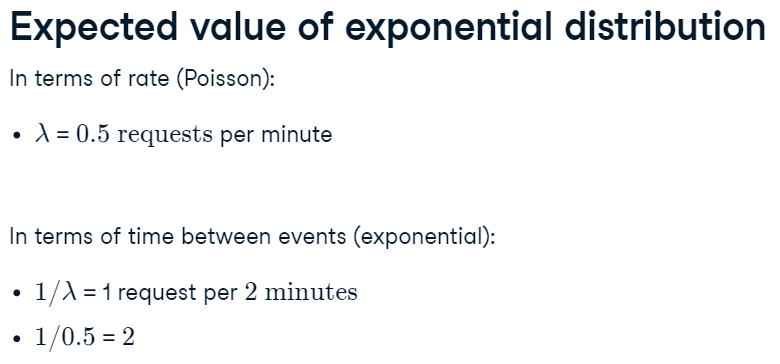

## (Students) t - Distribution ##

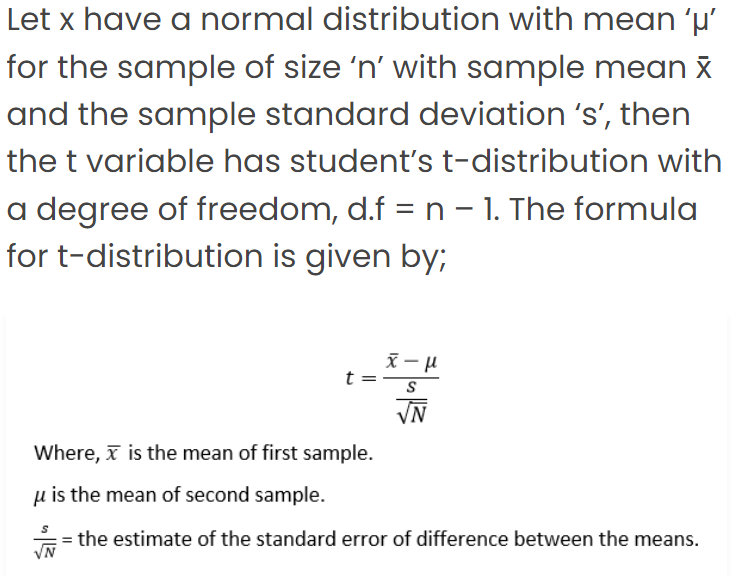
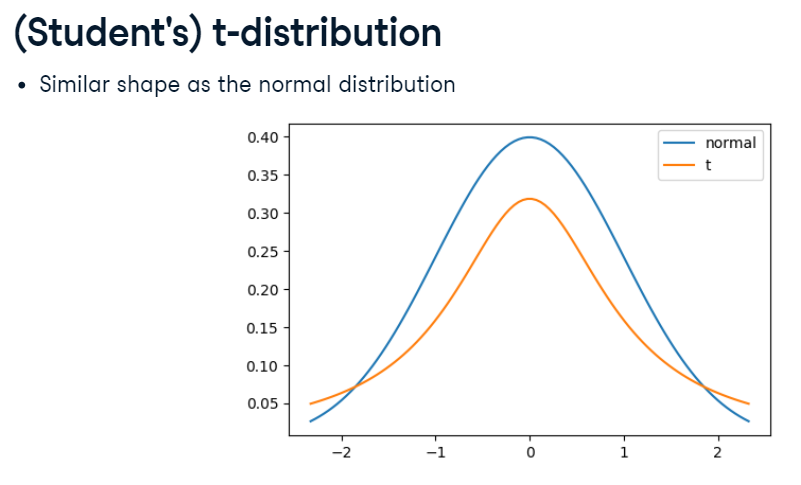

- Similar shape as the normal distribution
- In a t-distribution, observations are more likely to fall further from the mean
- Has a parameter called Degreed of Freedom
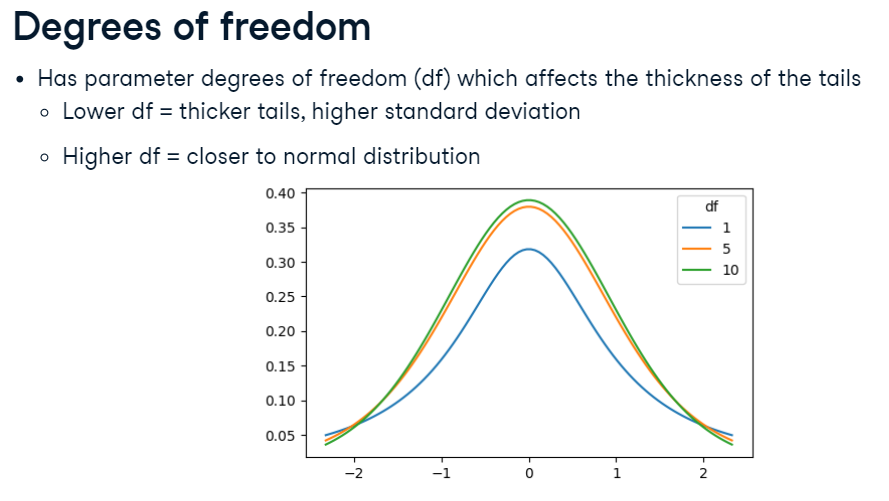

## Log Normal Distribution ##

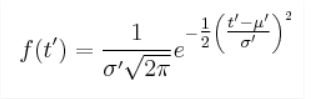

- Variables whose logarithm is normally distributed
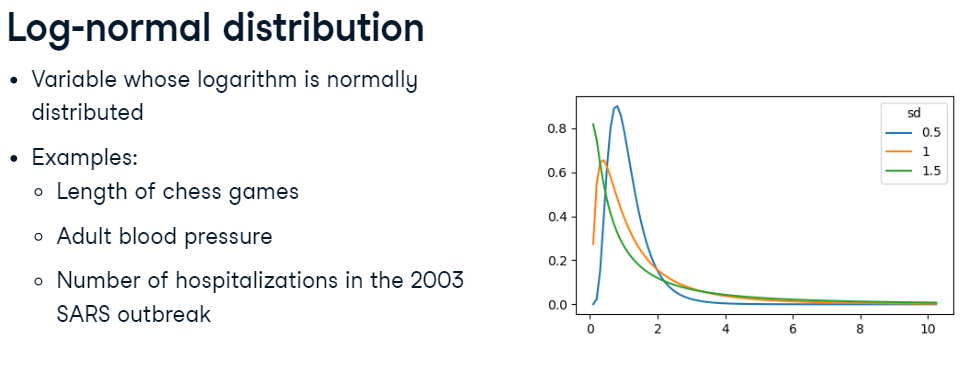



In [ ]:
# EXPONENTIAL DISTRIBUTION

from scipy.stats import expon

# How long until a new request is created?
# Syntax: expon.cdf(num_of_interest, scale = 1/lambda)
expon.cdf(1, scale = 2)

## Correlation ##

Correlation Coefficient
- Number between 1 & -1
- Its magnitude corresponds to the strength of the relationship
- Its sign(+ or -) corresponds to the direction of the relationship

Pearson Product Moment Correlation(r)
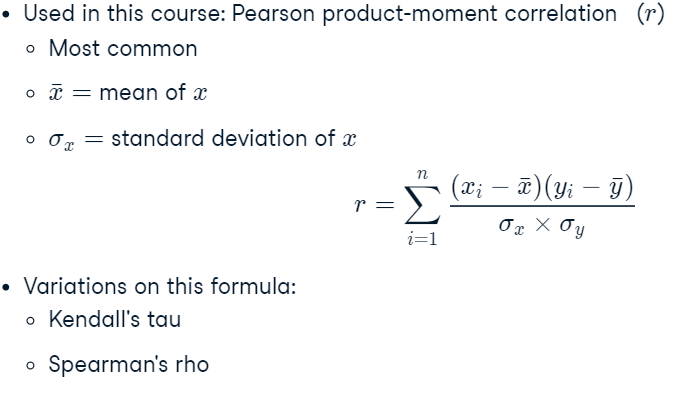


In [ ]:
# CORRELATION

import seaborn as sns

sns.scatterplot(x = "sleep_total", y = "sleep_REM", data = msleep)
sns.lmplot(x = "sleep_total", y = "sleep_REM", data = msleep, ci = None) # Adds a linear line of best fit to the plot
# ci stands for confidence interval margins. A confidence interval is a range of values that is likely to contain a population parameter with a certain level of confidence. In Seaborn, a 95% confidence interval is represented by a lighter blue line.
plt.show()

# Computing Correlations
# Syntax: DataFrame['Column 1].corr(DataFrame['Column 2])

## Correlationship Caveats ##

- Correlationship Coefficient measures the strength of linear relationships only
- When data is highly skewed, we apply a log Transformation
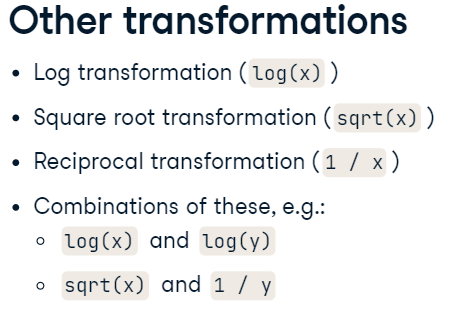
-Correlation does not imply causation i.e. if x is correlated with y then x does not necessarily cause y

Confounding:

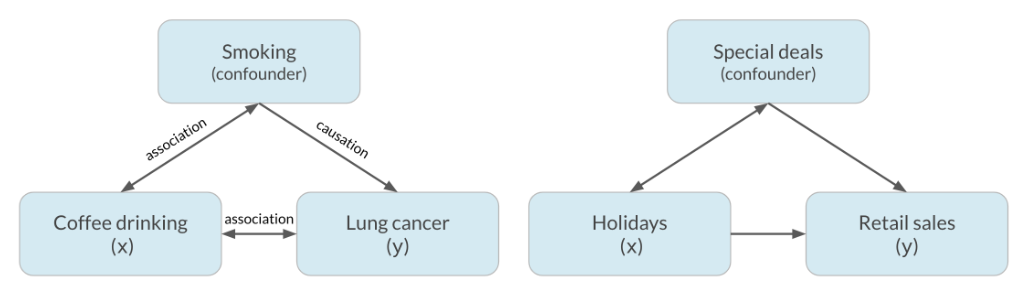

Why Use a Transformation?
- Certain statistical methods rely on variables having a linear relationship like correlation coeffecient and Linear Regression




In [ ]:
# LOG TRANSFORMATION

msleep['log_bodywt'] = np.log(msleep['bodywt'])
sns.lmplot(x = "log_bodywt", y = "awake", data = msleep, ci = None)
plt.show()

msleep['log_bodywt'].corr(msleep['awake'])

## Design of Experiments ##

- Experiments that aim to answer:
What is the effect of treatment on response?

Here, treatment: independent variable and response: dependent variable

CONTROLLED EXPERIMENTS:

- Participants are assigned to either treatment group(which recieves treatment) or the control group(which does not recieve treatment)

1) AB Test
treatment group : seees advertisement
control group: does not see advertisement

- Groups should be comparable so that causation can be infered. If they are unequal, then it can lead to confounding.

2) Observational Studies:
- Participants assign themselves to groups usuallly based on pre-existing characteristics
-eg: In a study to detemine if smoking affects cancer, you cant force people to smoke. People align themselves into one of two groups - smokers and non smokers.
- No way to be sure that the groups will be comoarable
- Thus observational studies only establish association and not causation
- There are ways to control for confounders and get more reliable conclusions about association


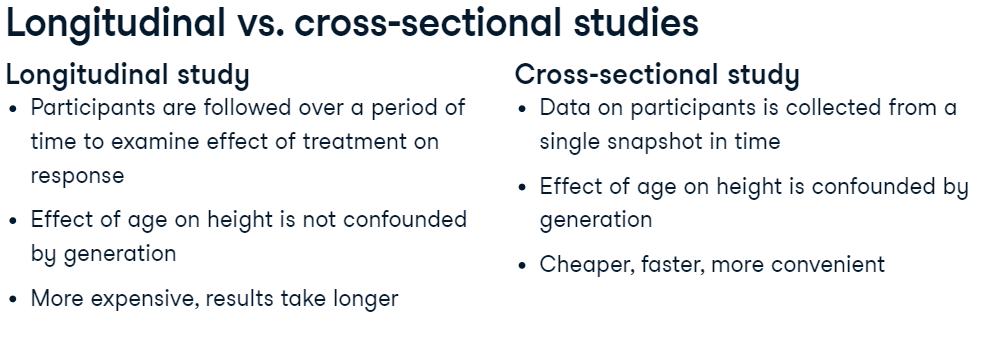

## Tools to Eliminate Bias in Experiments ##

1) Randomized Controlled Trial
- participants are randomly assigned to treatment and control group

2) Placebo
- Resembles treatment but has no effect
- It ensures that the effects of the treatment are due to the treatment itself and not the idea of the treatment

3) Double Blind Experiment
- Person administering the treatment also has no idea if he/she is administering the treatment or the placebo
- Helps in preventing biases and gives a more reliable conclusion about causation


